# Effects of Borrower's Parameters on Loan Parameters


## Investigation Overview

In this investigation we are going to examine: 

`Borrower's Parameters`:  

- EmploymentStatus (ES)
- EmploymentStatusDuration (EMP)
- IsBorrowerHomeowner (HOW)
- DebtToIncomeRatio (DIR)
- IncomeRange (IR)

and 

`Loan Parameters`:

- LoanOriginalAmount (LA)
- BorrowerAPR (APR)
- LoanStatus (LS)


### We will attempt to answer questions:

- What effects the Borrower’s Loan Amount?

- What effects the Borrower’s APR (annual percentage rate)?

- What type of relationship (if any) there is beteween Employment, Income, Loan Amount and APR?

- What are the characteristics of the large original Loan Amounts?

- What are risky characteristics of "bad" (delinquent) loans?



## Dataset Overview

- This data set contains 113,937 loans with 81 variables on each loan. 

- There are numeric variables such as: 

BorrowerAPR, MonthlyLoanPayment, EmploymentStatusDuration, DebtToIncomeRatio, LoanOriginalAmount.

- There're also categorical variables such as: 

LoanStatus: Chargedoff, Defaulted, Past Due, Current, Completed;

IncomeRange: Not employed, Not displayed, USD 1-24,999, USD 25,000-49,999, USD 50,000-74,999, USD 75,000-99,999, USD 100,000+;

- Data Types in this data: bool(3), float64(50), int64(11), object(17)
- Data points were removed from the analysis due to inconsistencies or missing information, some were merged in the process of tidying the data. 
- As a result the original dataset shrunk by around nine thousand datapoints.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# Read data from file into DF ld
ld_c = pd.read_csv('/Users/SeniKamara/BESTPICK/DATA_SCIENCE/DAND/PROJECT_5/PROJECT_5.5/PROJECT_SUBMISSION/prosperLoanData.csv')


In [4]:
# First we make copy of the original DF
ld = ld_c.copy()

In [5]:
# Looking at the overall shape of the DF
ld.shape

(113937, 81)

In [6]:
# Looking at the structure of the dataset
ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

## Percentages of Homeowners 

 `IsBorrowerHomeowner`:
 
 - The piechart shows that homeownership is evenly devided between borrowers.
 
 `Insight`: <font color="#007ff">Lack of homeonwership doesn't seem to decrease chances of getting a loan</font>


In [7]:
# Checking for the different values in the IsBorrowerHomeowner column
ld.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

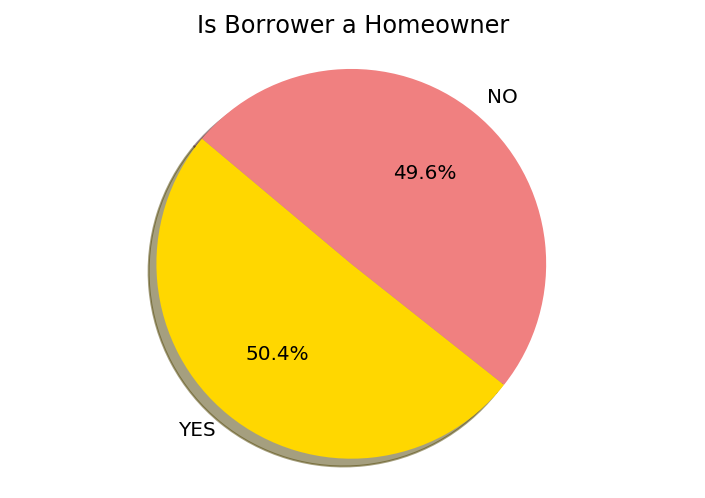

In [8]:
labels = 'YES', 'NO'
sizes = [57478, 56459]
colors = ['gold','lightcoral']

plt.title('Is Borrower a Homeowner')


# Plot
plt.pie(sizes, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

 ## Distribution of Employment Status 
 
`EmploymentStatus`:

 - 59.1% of all borrowers are `Employed`
 - 23.1% of all borrowers are `Full-time`
 - 5.4% of all borrowers are `Self-employed`
 - 4.7% of all borrowers are `Not-Available`
 - 2255 entries with Null values 
 
 `Insight`: <font color="#007ff">Around 4.7% of borrowers don't have a regular income.</font>
 
 

In [10]:
# Checking for the different values in the LoanStatus column
ld.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [11]:
# Checking for null values
ld.EmploymentStatus.isnull().sum()

2255

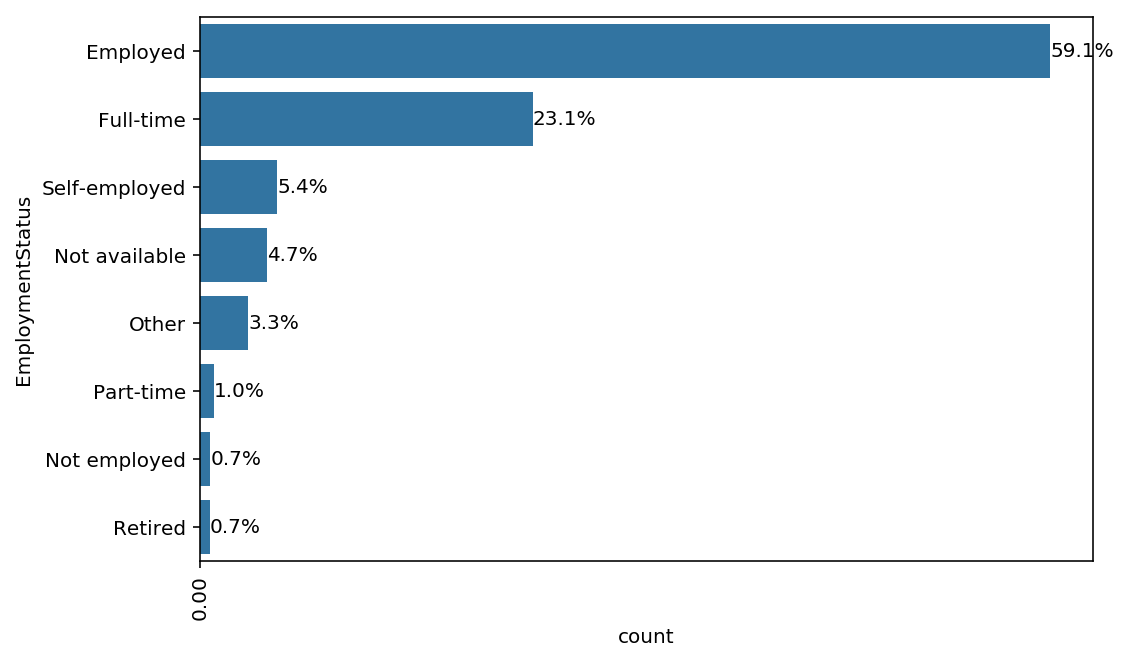

In [13]:
# Setting plot size
plt.figure(figsize = [8, 5])

# Setting color and order
base_color = sb.color_palette()[0]
es_counts = ld['EmploymentStatus'].value_counts()
es_order = es_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labeling the x axis
plt.xlabel('proportion');
plt.xticks(rotation = 90); #Rotating the labels 90 deg not to overlap

# Labelling the bars with ratio parameters
for i in range(es_counts.shape[0]):
    count = es_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'EmploymentStatus', 
             color = base_color, order = es_order);



 ## Distiribution of Loan Status
 
 `LoanStatus` :
 - Almost 50% of loans are current (paying interest)
 - 33% of all loans are repaid
 - 10.5% are written off (can't be recovered)
 - 4.5% are deliquent
 
 `Insight`: <font color="#007ff">16.7% of all loans in the dataset are bad business</font>


In [18]:
# Checking for the different values in the LoanStatus column
ld.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [19]:
ld.LoanStatus.isnull().sum()

0

In [20]:
# Combining categories of 'Past Due' values; also 'FinalPaymentInProgress' with 'Completed'
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (1-15 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (31-60 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (61-90 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (91-120 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (16-30 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('Past Due (>120 days)', 'Past Due')
ld['LoanStatus'] = ld['LoanStatus'].replace('FinalPaymentInProgress', 'Completed')

In [21]:
# Dropping the outliers 'Cancelled'
#df = df[df.line_race != 0]
ld = ld[ld.LoanStatus != 'Cancelled']

In [22]:
# Checking the code
ld.LoanStatus.value_counts()

Current       56576
Completed     38279
Chargedoff    11992
Defaulted      5018
Past Due       2067
Name: LoanStatus, dtype: int64

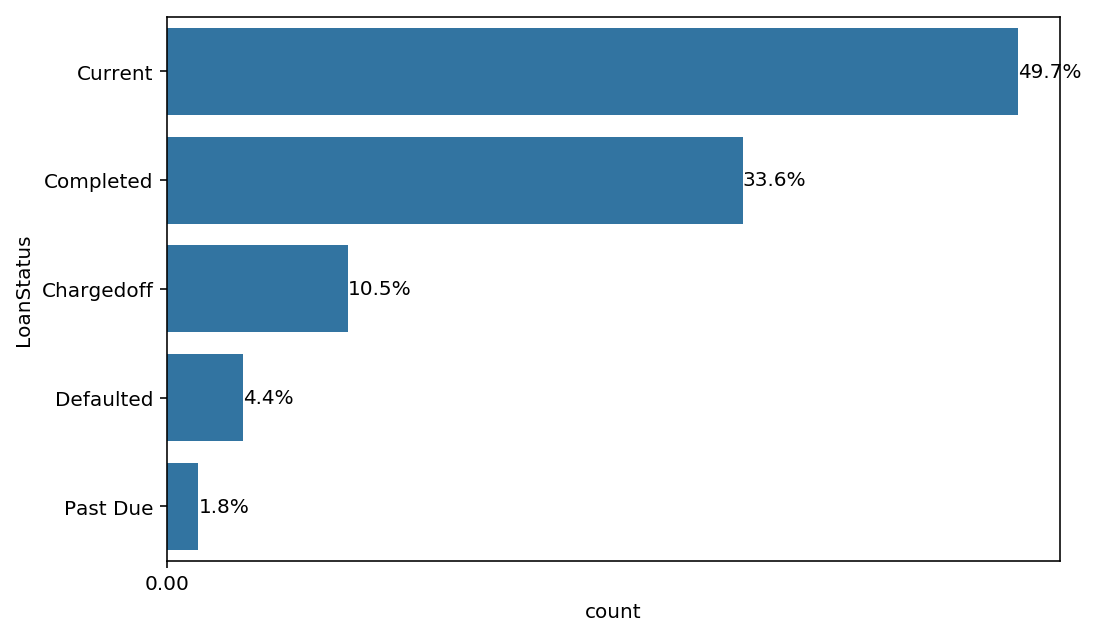

In [23]:
# Setting plot size
plt.figure(figsize = [8, 5])
# Setting color and order
base_color = sb.color_palette()[0]
ls_counts = ld['LoanStatus'].value_counts()
ls_order = ls_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['LoanStatus'].value_counts().max()
max_prop = max_count / n_ld

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# Labelling the bars with ratio parameters
for i in range(ls_counts.shape[0]):
    count = ls_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
sb.countplot(data = ld, y = 'LoanStatus', 
             color = base_color, order = ls_order);



 ## Distribution of Income Range
 
 `IncomeRange` :
 - Income ranges: USD 25,000-49,999 and USD 50,000-74,999 make up 28.3% and 27.3% respectively of all loans, and they make up the largest quantities 
 - Income ranges: USD 100,000+ and USD 75,000-99,999 make up 15.2% and 14.8% respectively of all loans.  The second largest quantities.  

 
 `Insight`: <font color="#007ff">Income ranges: USD 100,000+ and USD 75,000-99,999 together make up 30% of all loans.</font> 
 


In [24]:
# Exploring values of the 'IncomeRange' variable
ld.IncomeRange.value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [25]:
# Combining "$0" and "Not empoloyed" values
ld['IncomeRange'] = ld['IncomeRange'].replace('$0', 'Not employed')

In [26]:
ld.IncomeRange.value_counts()

$25,000-49,999    32191
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7737
$1-24,999          7274
Not employed       1427
Name: IncomeRange, dtype: int64

In [28]:
# convert LoanStatus and IncomeRange into ordered categorical types
ordinal_var_dict = {'LoanStatus': ['Chargedoff', 'Defaulted', 'Past Due', 'Current', 'Completed'],
                    'IncomeRange': ['Not employed', 'Not displayed', '$1-24,999', '$25,000-49,999', 
                                    '$50,000-74,999', '$75,000-99,999', '$100,000+']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    
ld[var] = ld[var].astype(ordered_var)
 

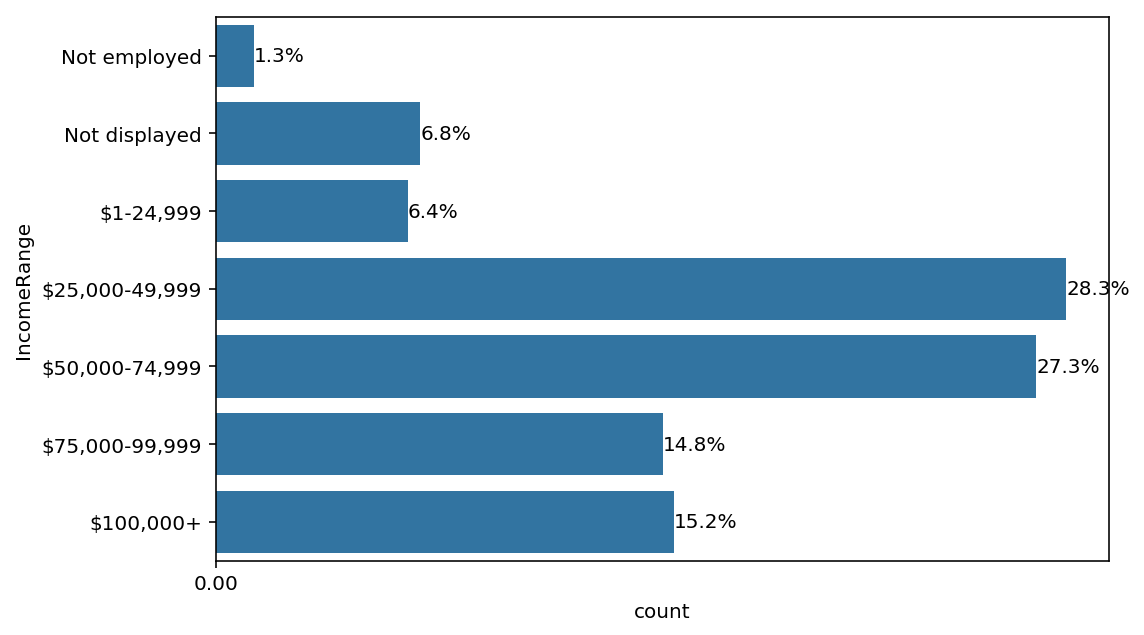

In [29]:
plt.figure(figsize = [8,5])
#ax = fig.add_axes([1, 5, 2, 10])

# Setting color and order
base_color = sb.color_palette()[0]
ir_counts = ld['IncomeRange'].value_counts()
#ir_order = ir_counts.index

# get proportion taken by most common group for derivation of tick marks
n_ld = ld.shape[0]
max_count = ld['IncomeRange'].value_counts().max()
max_prop = max_count / n_ld

# Adding the relative parameters to the plot
plt.xticks(tick_props * n_ld, tick_names)

# generate tick marks locations and names
tick_props = np.arange(0, max_prop, 0.5)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

# Labelling the bars with ratio parameters
for i in range(ir_counts.shape[0]):
    count = ir_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_ld)
    plt.text(count+1, i, pct_string, va = 'center');
    
    
sb.countplot(data = ld, y = 'IncomeRange', 
             color = base_color);

 ## Distribution of Loan Amount
 
 `LoanOriginalAmount` :
 - The graph shows that most of the loans are up to USD 5000
 - Graph also shows that most of the loans are taken/given in USD 5000 increments: USD 5K, USD 10000, USD 15000, USD 20000, USD 25000, USD 30000 and USD 35000
 
  `Insight`: <font color="#007ff">Lender specializes on commercial loans with, loan values (LV): USD 5K, USD 10K, USD 20K, USD 25K, USD 30K, and USD 35K</font>


In [30]:
ld.LoanOriginalAmount.isnull().sum()

0

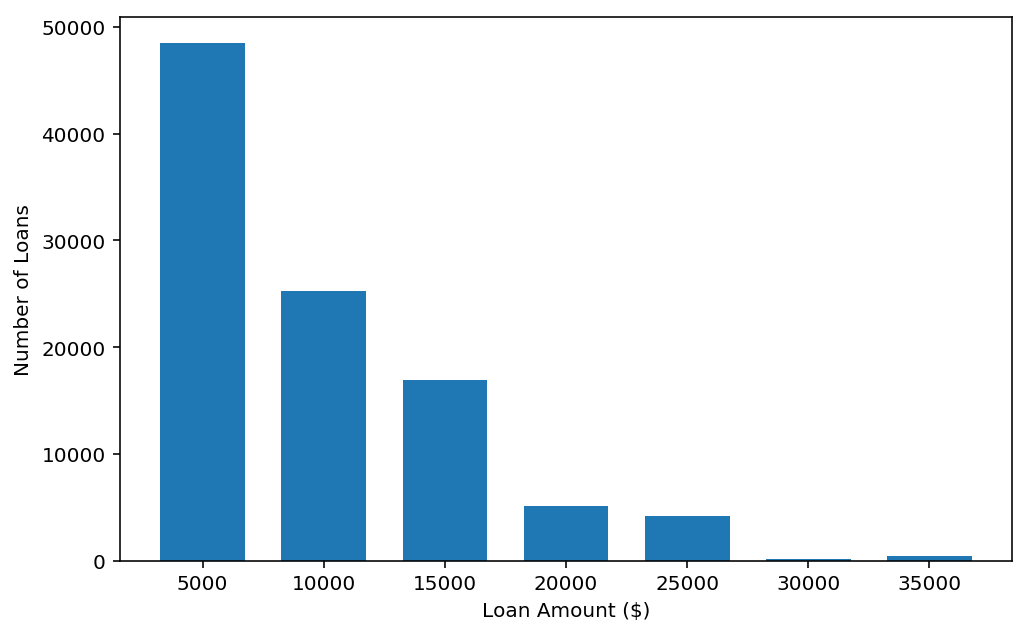

In [32]:
# Organizing the bins for better visualisation
plt.figure(figsize = [8,5])
bin_edges = np.arange(2500, 35000+5000, 5000)
plt.hist(ld['LoanOriginalAmount'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(5000, 35000+2500, 5000))
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans');

 ## Distribution of Borrower's APR
 
 `BorrowerAPR` :
 - The plot shows that most loans are taken/given around 0.2% rate.
 - Loans with 0.1% and with ) 0.3% APR are in second place
 - The least quantity of loans in the portfolio have 0.4% APR.
 
  `Insight`: <font color="#007ff">Quantity of loans with 0.4% is considerably small compared to the other rates.</font>
  

In [34]:
ld.BorrowerAPR.isnull().sum()

25

In [35]:
# Dropping the null values
# df.dropna(subset=['name', 'born'])
ld.dropna(subset=['BorrowerAPR'], inplace=True)

In [36]:
ld.BorrowerAPR.isnull().sum()

0

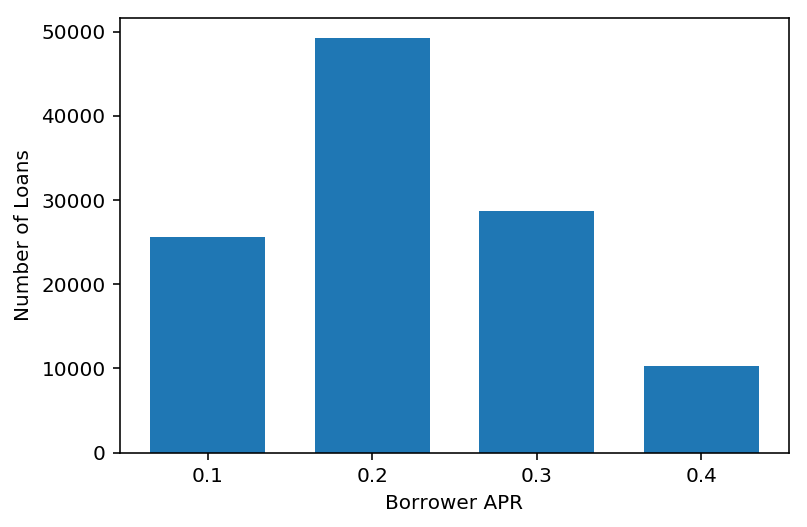

In [37]:
# Plotting histogram with variable 'BorrowerAPR'
# Organizing the bins for better visualisation
bin_edges = np.arange(0.05, 0.4+0.1, 0.1)
plt.hist(ld['BorrowerAPR'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0.1, 0.4+0.05, 0.1))
plt.xlabel('Borrower APR')
plt.ylabel('Number of Loans');

 ## After doing some exploratory analysis of 
 
 `EmploymentStatusDuration` :
 - Plotted on a logarithmic scale. The distribution shows that most borrowers have: 50 to 200 months or 4 to 16 years of employment history.
 
  `Insight`: <font color="#007ff">Most of the borrowers have a solid employment history. 13721 loans are given to borrowers with less than 12 months of employment.</font>  
 

In [38]:
ld.EmploymentStatusDuration.isnull().sum()

7596

In [39]:
ld_em =ld.dropna(subset=['EmploymentStatusDuration'])

In [40]:
ld_em.EmploymentStatusDuration.isnull().sum()

0

In [55]:
# Select low outliers
low_outliers = (ld_em['EmploymentStatusDuration'] < 12)
print(low_outliers.sum())


13721


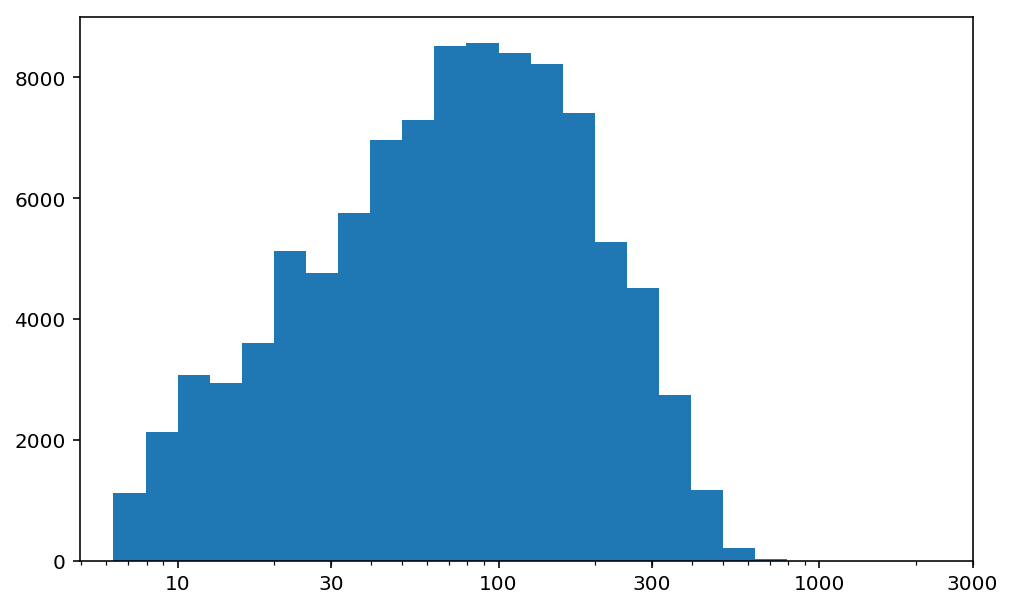

In [42]:
# Converting the xscale and ticks for better readability 
plt.figure(figsize = [8, 5])
bin_edges = 10 ** np.arange(0.8, np.log10(ld.EmploymentStatusDuration.max())+0.1, 0.1)
plt.hist(ld.EmploymentStatusDuration, bins = bin_edges)
plt.xscale('log')

#It is important that the xticks are specified after xscale since that 
#function has its own built-in tick settings.
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs);

 ## Debt to Income Ratio distribution
 
 `DebtToIncomeRatio` :
 - The plot shows that most loans have Debt to Income (DIR) ratio between 0.1 and 0.2.
 
  `Insight`: <font color="#007ff">Very unusual outliers showing a large number of loans with a very high Income to Debt ratio 1205 loans > 0.8 DIR ratio, but 799 loans > 1 DI ratio</font>  
  

In [58]:
# Checking for nulls in ld_em (dropped EMP nulls)
ld_em.DebtToIncomeRatio.isnull().sum()

8424

In [45]:
# Dropping the nulls in DI
ld_em_di = ld.dropna(subset=['DebtToIncomeRatio'])

In [46]:
# Checking code
ld_em_di.DebtToIncomeRatio.isnull().sum()

0

In [47]:
ld_em_di['DebtToIncomeRatio'].describe()

count    105353.000000
mean          0.275998
std           0.551826
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

In [48]:
# Select more_risky loans - more than 80% of income
more_risky = (ld_em_di['DebtToIncomeRatio'] > 0.8)
print(more_risky.sum())

1205


In [67]:
# Select very_risky loans - more than 100% of income
very_risky = (ld_em_di['DebtToIncomeRatio'] > 1)
print(very_risky.sum())

799


In [50]:
# Dropping loans where DIR > 1
ld_di = ld_em_di[ld_em_di['DebtToIncomeRatio'] < 1]

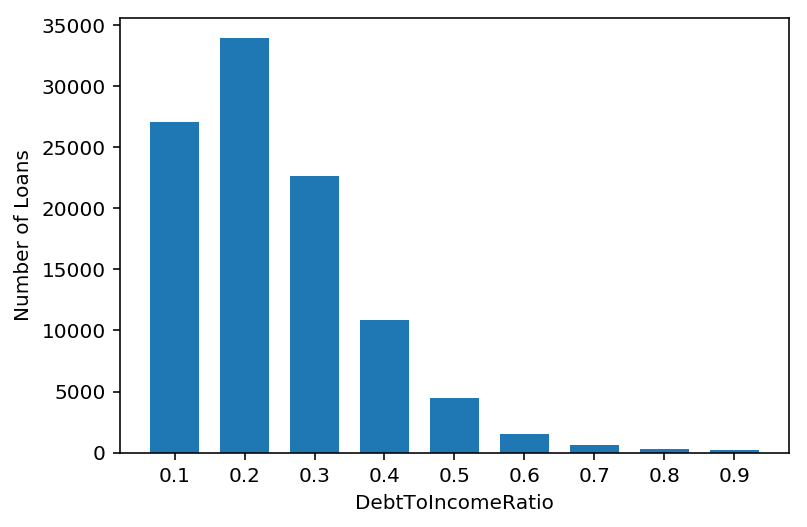

In [57]:
# Plotting histogram with variable 'BorrowerAPR'
# Organizing the bins for better visualisation
bin_edges = np.arange(0.05, 0.9+0.1, 0.1)
plt.hist(ld_di['DebtToIncomeRatio'] , bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0.1, 0.9+0.05, 0.1))
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Number of Loans');

In [61]:
# Assign ld_di DF to a new "Univariate Explored" DF - ld_u for further explorations
ld_u = ld_di

## LoanOriginalAmount vs. BorrowerAPR

Here the negative correlation b/w the APR and the LA is presented by the negative slope of the regression line. Meaning that larger LAs are given at lower APRs.

However, another `insight` is coming to light.  There seems to be a fixed relationship, where a paticular LA (10K, 15K, 20K...) is given out at different APRs.


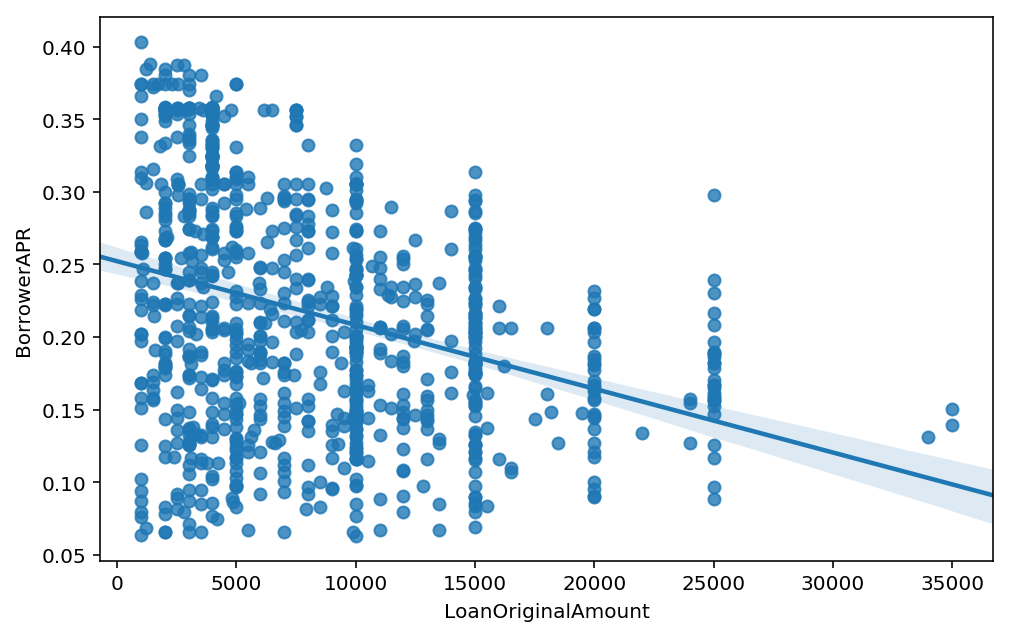

In [82]:
# Checking supposed negative relationship b/w APR and LA (-0.3)

# Sample 1000 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 1000, replace = False)
loans_samp = ld_u.loc[samples,:]

plt.figure(figsize = [8, 5])
sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR');

## Debt to Income Ratio vs APR
Shows a slight positive relationship, meaning higher DIR leads to higher APR.  That can be understood in terms of risk.


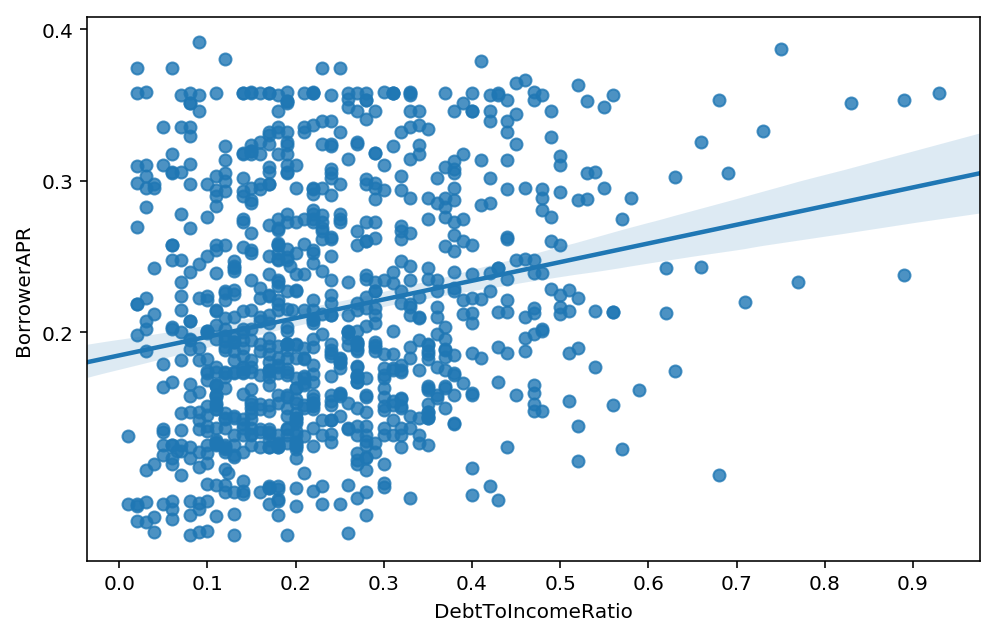

In [85]:
# Checking supposed negative relationship b/w DIR and APR

# Sample 1000 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 1000, replace = False)
loans_samp = ld_u.loc[samples,:]

plt.figure(figsize = [8, 5])
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.yticks([0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
sb.regplot(data = loans_samp, x = 'DebtToIncomeRatio', y = 'BorrowerAPR');

## Debt to Income Ratio vs Loan Amount
Not much correlation, but there is a pattern which shows that most LAs are issued with DIR < 0.60. This can be understood because of risk. We can see a pattern that 35K LA stops at 0.4 DIR; 25K LA level has higer DIR on record (0.6); 15K LA registered (0.9) and so on. So we see a relationship: higher DIRs - lower LAs. This is logical: lendging large amounts to borrowers with high debt burdern is very risky and irresponsible.


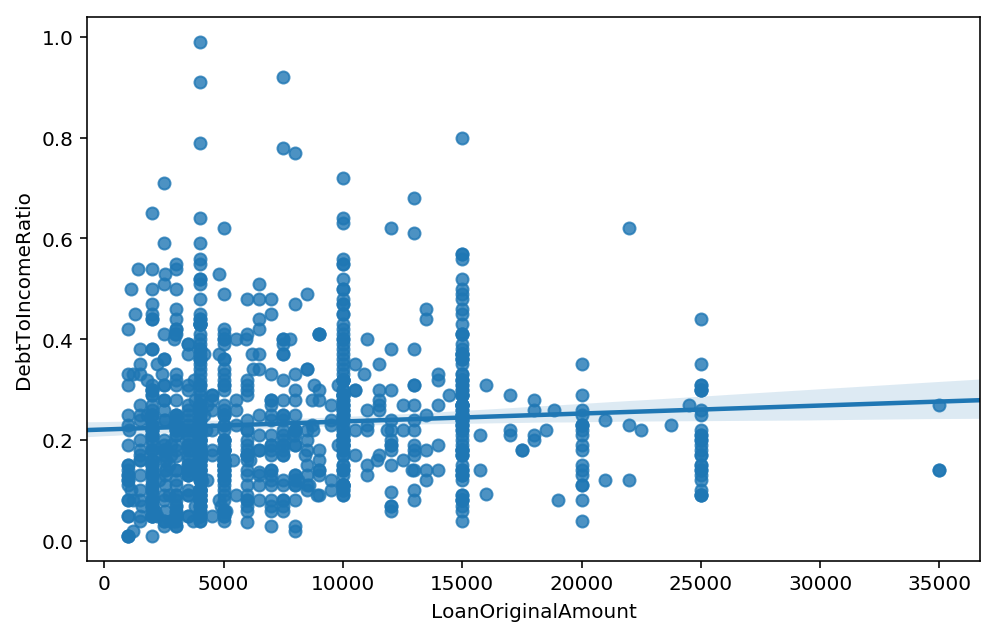

In [88]:
# Sample 1000 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0],1000, replace = False)
loans_samp = ld_u.loc[samples,:]

# Plot DIR vs LA
plt.figure(figsize = [8, 5])
sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y = 'DebtToIncomeRatio');

## Employment Status Duration vs Loan Amount
No evident correlation between EMP and LA

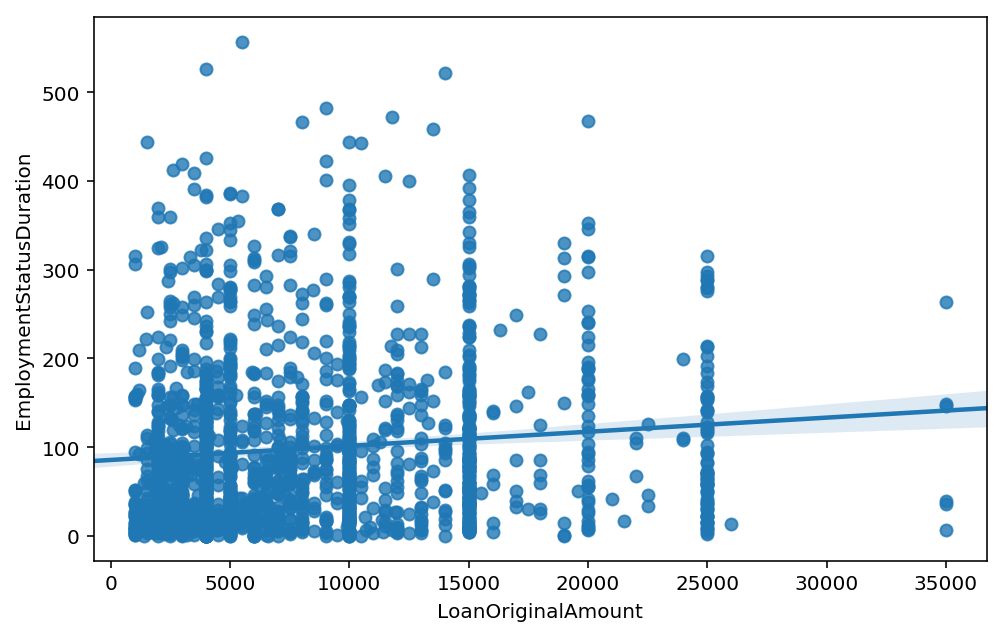

In [89]:
# Sample 2000 loans so that plot is clearer and renders faster
samples = np.random.choice(ld_u.shape[0], 2000, replace = False)
loans_samp = ld_u.loc[samples,:]

plt.figure(figsize = [8, 5])
sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y = 'EmploymentStatusDuration');

## Employment Status vs Loan Amount and APR

In it is evedent from the plot that status "Employed" gets more of larger LAs compared to the other statuses.

For the majority loans in the "low employment" categories ("Part-time", "Retired" and "Not employed" except for "Not-available"), the APR is lower than the "high employment" categories ("Employed", "Full-time", "Other").


In [91]:
# Setting up 'EmploymentStatus' categorical variables 
empstatus_vars = ['Employed', 'Full-time', 'Not available', 
                  'Other', 'Self-employed', 'Part-time', 
                  'Retired', 'Not employed']
estatuses = pd.api.types.CategoricalDtype(ordered = True, 
                                        categories = empstatus_vars)
ld_u['EmploymentStatus'] = ld_u['EmploymentStatus'].astype(estatuses);

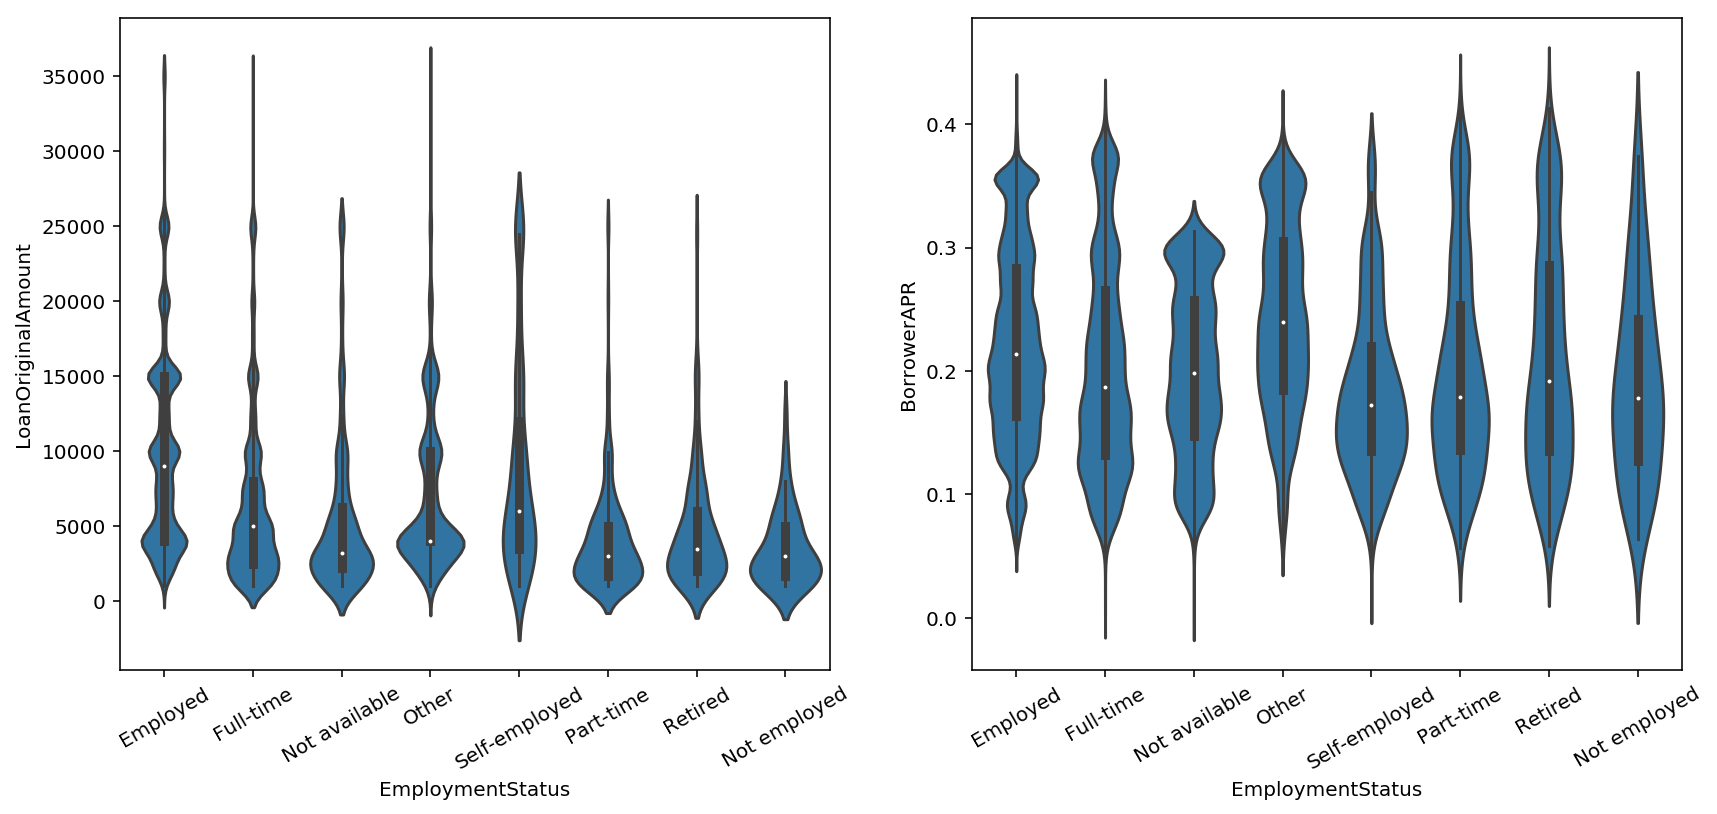

In [92]:

plt.figure(figsize = [14, 6])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = ld_u, x = 'EmploymentStatus', y = 'LoanOriginalAmount', color = base_color)
plt.xticks(rotation = 30);

# right plot: box plot
plt.subplot(1, 2, 2)
sb.violinplot(data = ld_u, x = 'EmploymentStatus', y = 'BorrowerAPR', color = base_color)
plt.xticks(rotation = 30);
#plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot



##  "Higher" Employment Status vs Income Range

The plot clearly shows that "Employed" status has more borrowers than "Full-time" with the majority in 50K-74.9K IR and 25K-49.9K IR in the second place. For "Full-time" borrowers the majority is in 25K-49.9K IR and 50K-74.9K IR in the second place.



In [103]:
ld_esx = ld_u.loc[(ld_u['EmploymentStatus']=='Employed') | 
                   (ld_u['EmploymentStatus']=='Full-time') | 
                   (ld_u['EmploymentStatus']=='Not available')]

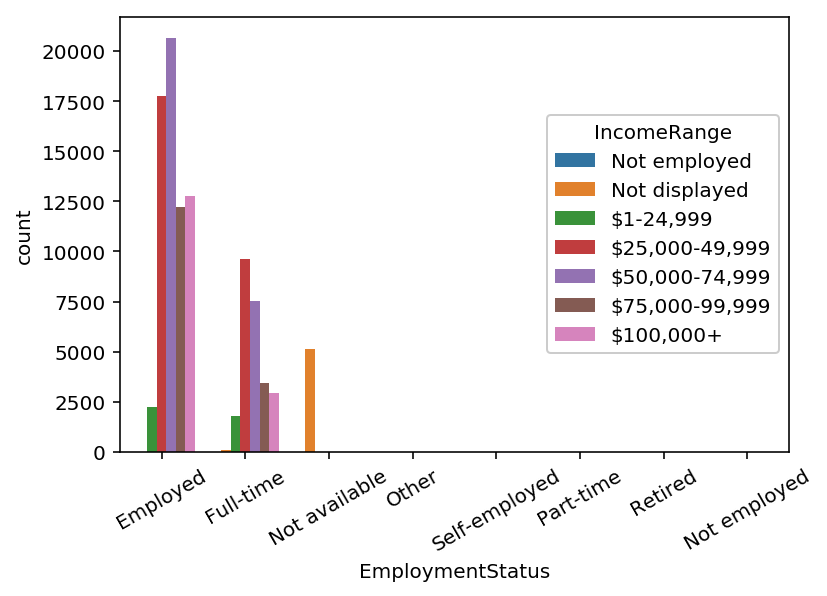

In [104]:
#sb.countplot(data = ld_empx, x = 'EmploymentStatus', hue = 'IncomeRange');
ax = sb.countplot(data = ld_esx, x = 'EmploymentStatus', hue = 'IncomeRange')
ax.legend(loc = 7, ncol = 1, framealpha = 1, title = 'IncomeRange');
plt.xticks(rotation = 30);

##  "Lower" Employment Status vs Income Range

Status "Other" is showing the largest number of borrowers compared to the other ESs, with its primary IR of 25K-49.9K, which is almost twice bigger than the next 2 IRs, 1K-24.9K and 50K-74.9K. 25K-49.9K is also leading in the "Self-employed" ES, and 1K-24.9K is the main IR in the "Part-time" ES.



In [106]:
# Analizing the other ESs

ld_esxy = ld_u.loc[(ld_u['EmploymentStatus']=='Not employed') | 
                    (ld_u['EmploymentStatus']=='Retired') | 
                    (ld_u['EmploymentStatus']=='Part-time') | 
                    (ld_u['EmploymentStatus']=='Self-employed') | 
                    (ld_u['EmploymentStatus']=='Other')]


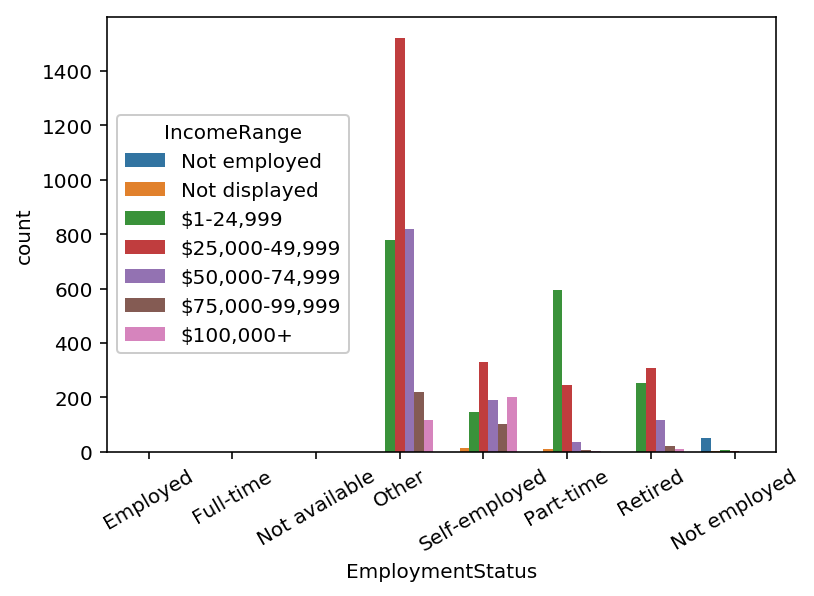

In [107]:
#sb.countplot(data = ld_empx, x = 'EmploymentStatus', hue = 'IncomeRange');
ax = sb.countplot(data = ld_esxy, x = 'EmploymentStatus', hue = 'IncomeRange')
ax.legend(loc = 6, ncol = 1, framealpha = 1, title = 'IncomeRange');
plt.xticks(rotation = 30);

## Employment Status vs Loan Amount and APR

It is evident from the plot that "Employed" status receives bigger loans at lower interest rates compared to "Full-time" status. Beyond 25K LA, only "Employed" received loans.

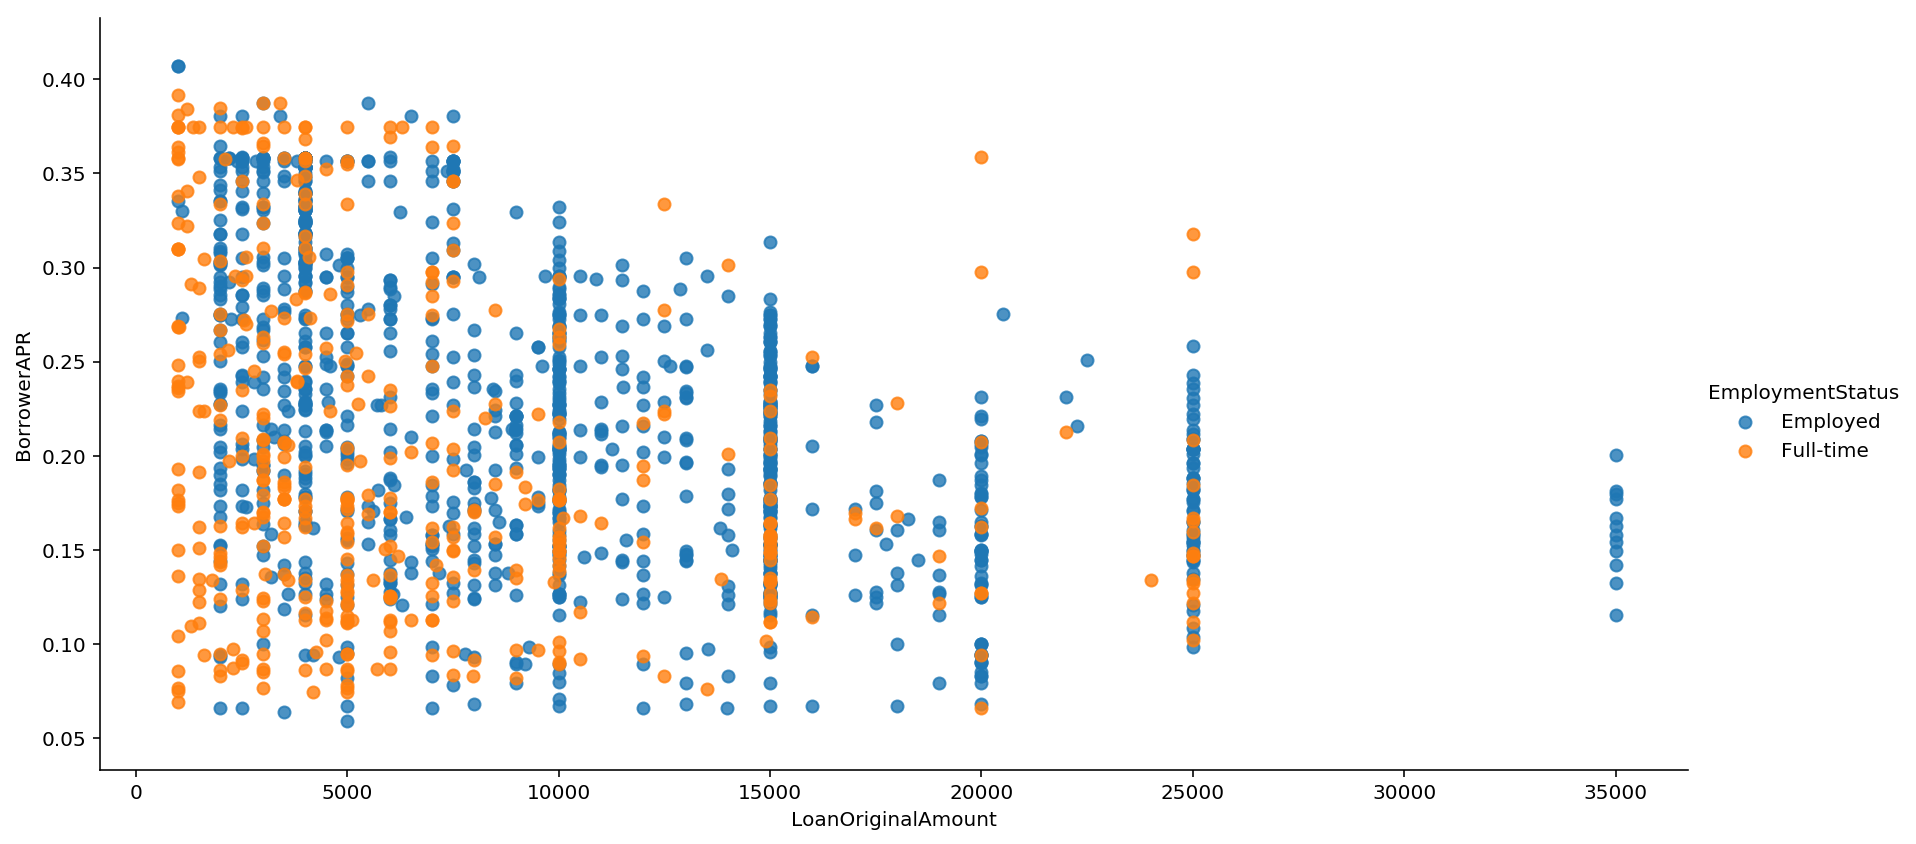

In [110]:
samples = np.random.choice(ld_u.shape[0], 2000, replace = False)
loans_samp = ld_u.loc[samples,:]


g = sb.FacetGrid(data = loans_samp, hue = 'EmploymentStatus',
                hue_order = ['Employed', 'Full-time'], 
                 height = 6, aspect = 2)
g = g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False);
g.add_legend();

## Income Range vs Loan Amount and APR

It is clearly seen that "darker", 100K+ IR qulify for 15K LA onwards. And "lighter", lower IR qualify for smaller loan amounts. We also see that larger loans for high IR come with a lower APR than the lower ones.

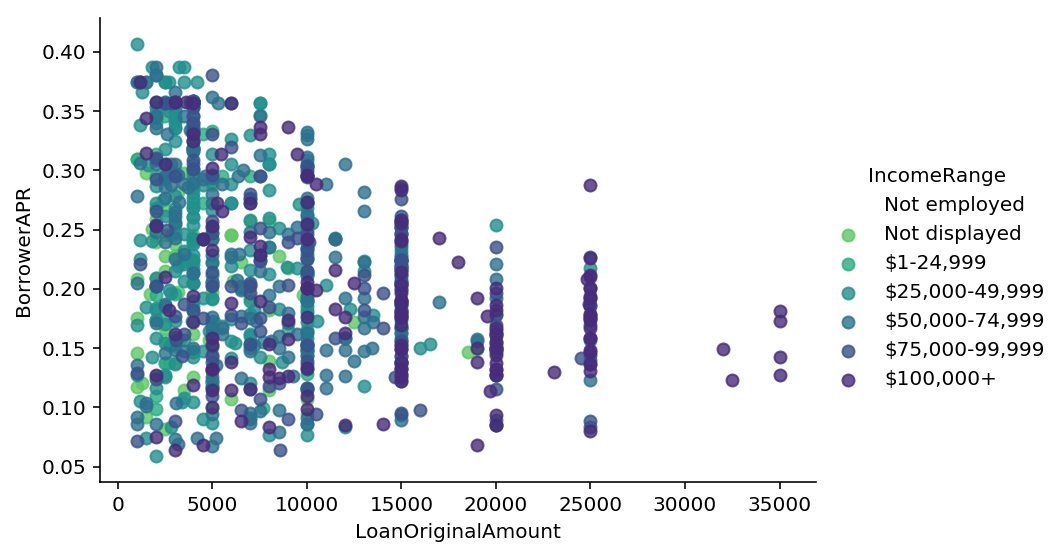

In [111]:
samples = np.random.choice(ld_u.shape[0], 1000, replace = False)
loans_samp = ld_u.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, 
                 hue = 'IncomeRange', 
                 height = 4, aspect = 1.5, 
                 palette = 'viridis_r') #palette instead of hue_order
g = g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.04, fit_reg = False);
g.add_legend();

## Debt to Income Rate vs Loan Amount and APR


There is no visible trend or relationship on the plot above

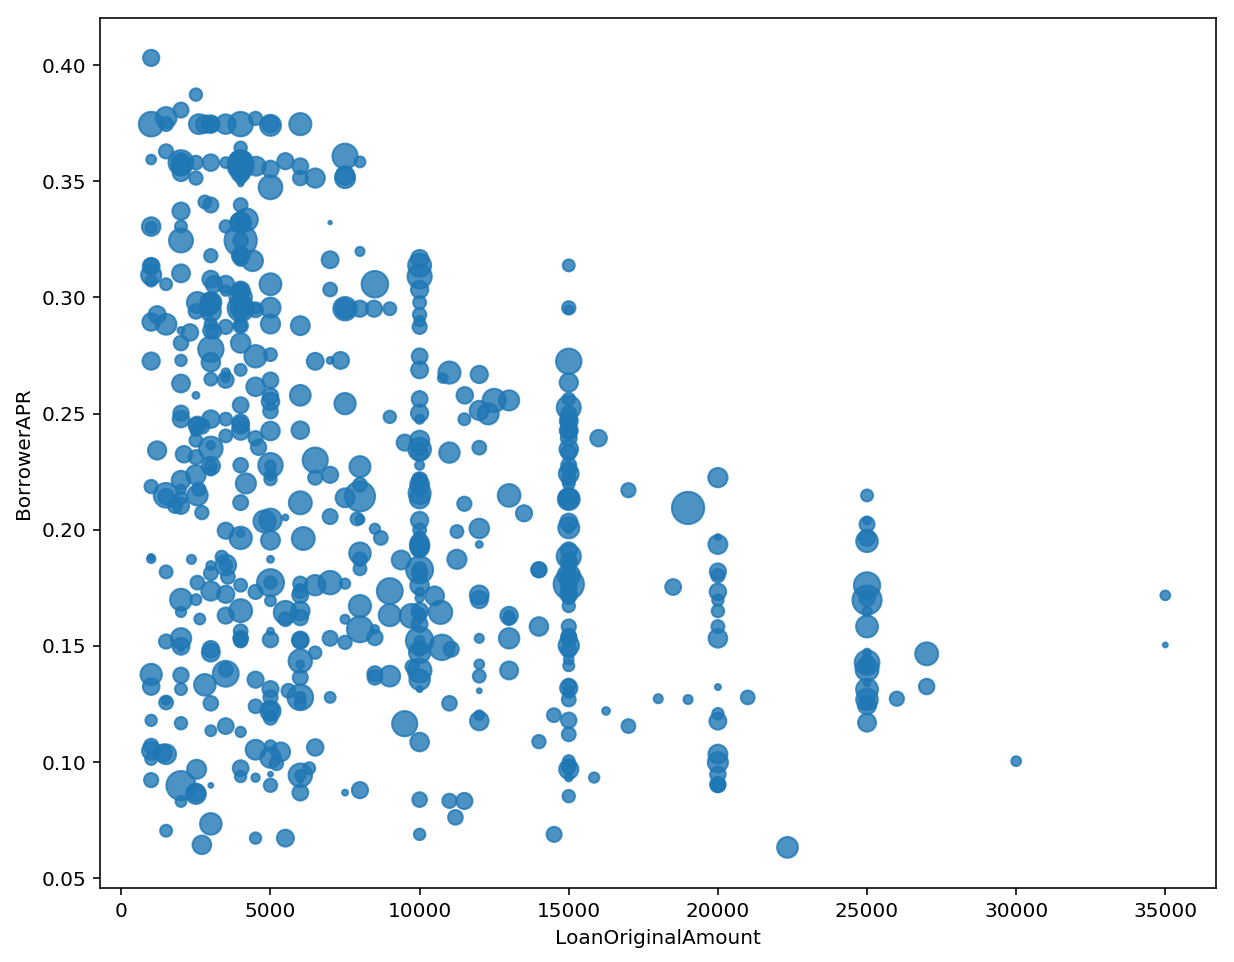

In [112]:
samples = np.random.choice(ld_u.shape[0],700, replace = False)
loans_samp = ld_u.loc[samples,:]

plt.figure(figsize = [10, 8])


sb.regplot(data = loans_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
           x_jitter = 0.1, fit_reg = False, 
           scatter_kws = {'s' : loans_samp['DebtToIncomeRatio']*300});

#    plt.xlabel('Loan Amount in USD')
#    plt.ylabel('Debt to Income Ratio')
#    plt.legend(['Completed', 'Chargedoff'])

## Home ownership vs Loan Amount and APR


"Current" LS shows that now homeowners are priveleged with higher LAs in comparison to "non-homeowners". "Completed" LS displays a similar relationship as above, but at lower LAs. "Chargedoff" is only slightly in favor of homeowners with respect to LAs. "Defaulted" LS is showing "non-homeowners" with LAs that are clustered around small values as opposed the homeowners where the defaults are spread accross smaller and larger LAs.

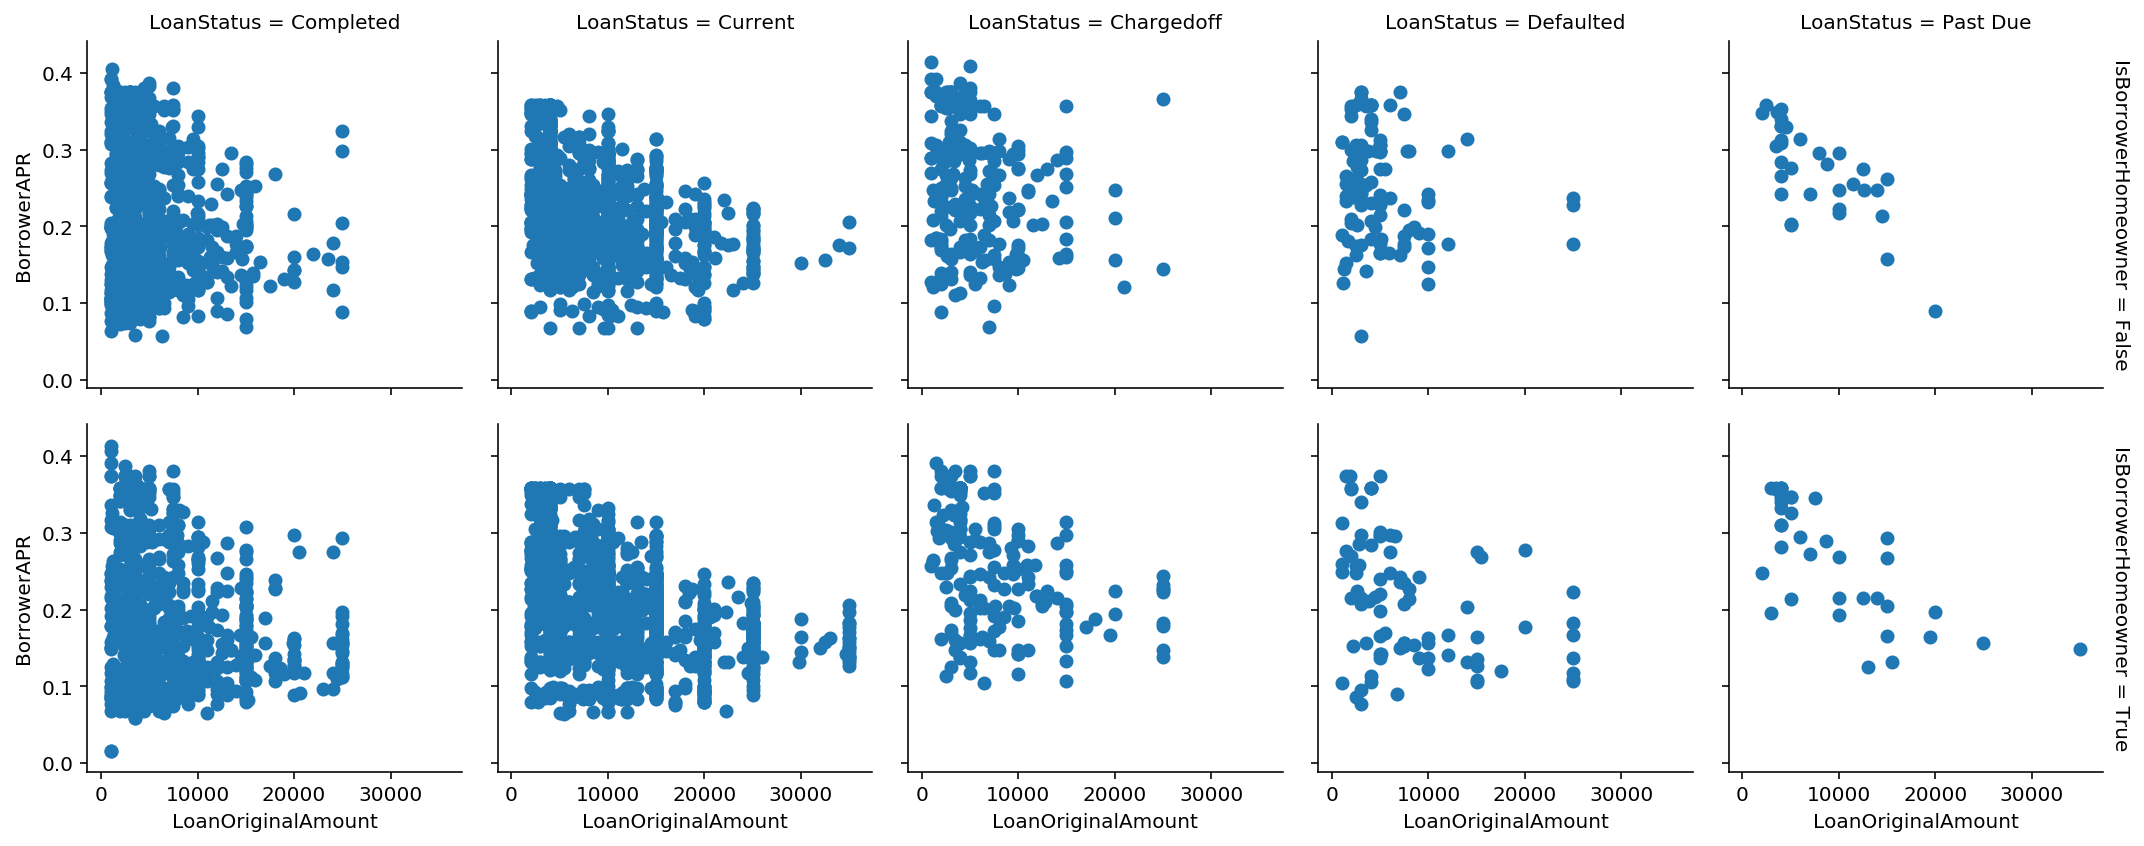

In [113]:
samples = np.random.choice(ld_u.shape[0], 5000, replace = False)
loans_samp = ld_u.loc[samples,:]

g = sb.FacetGrid(data = loans_samp, col = 'LoanStatus', row = 'IsBorrowerHomeowner',
                margin_titles = True)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR');

## Loan Status vs Loan Amount and APR
#### "Current" vs "Chargedoff"

Slide Type
We can see the how the lender with the "Current" loans have used past experience and adjusted his lending strategy from "small" LAs < 1,5K to larger LAs > K2,5 LAs, and from high APRs > 0.36 to > 0.36 larger sums at smaller APRs.


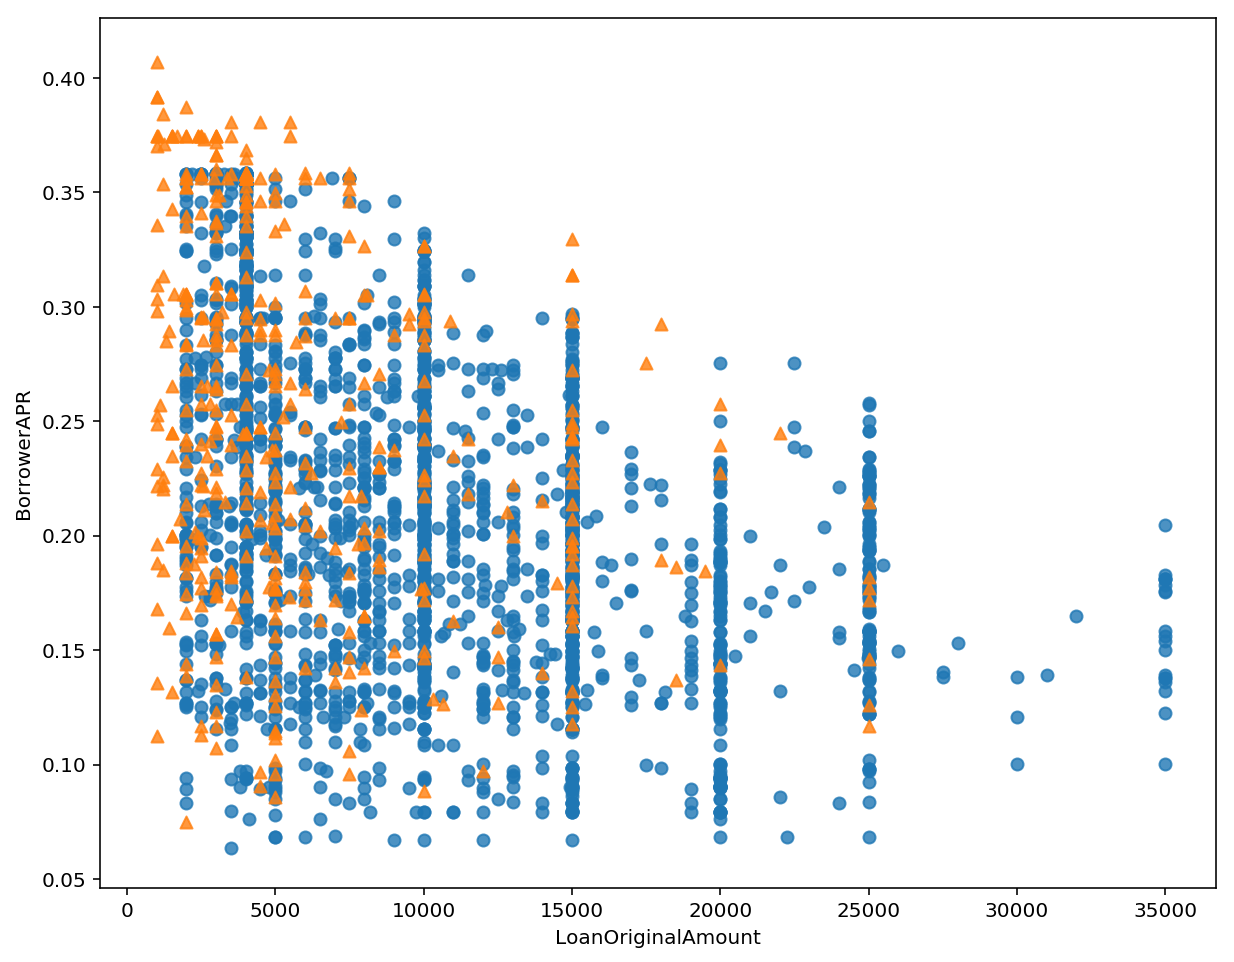

In [114]:
samples = np.random.choice(ld_u.shape[0],5000, replace = False)
loans_samp = ld_u.loc[samples,:]


ttype_markers = [['Current', 'o'], 
                ['Chargedoff', '^']]
plt.figure(figsize = [10, 8])

for ttype, marker in ttype_markers:
    plot_data = loans_samp.loc[loans_samp['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
              x_jitter = 0.04, fit_reg = False, marker = marker);
#    plt.xlabel('Loan Amount in USD')
#    plt.ylabel('Debt to Income Ratio')
#    plt.legend(['Completed', 'Chargedoff'])


## Loan Status vs Loan Amount and APR
#### "Defaulted" vs "Current"


Same shift away from smaller loans and high rates is reflect in this plot

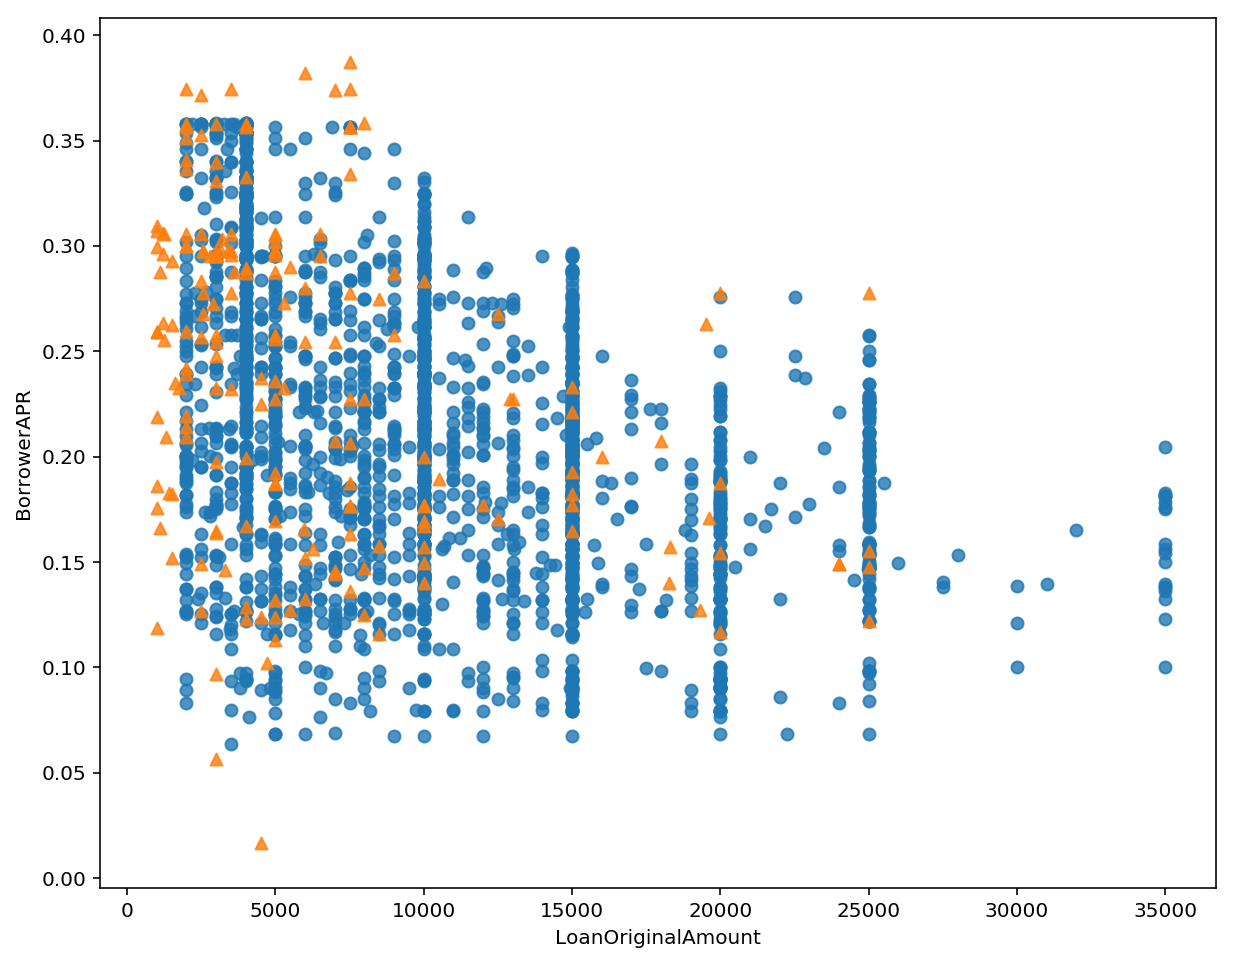

In [115]:

ttype_markers = [['Current', 'o'], 
                ['Defaulted', '^']]
plt.figure(figsize = [10, 8])

for ttype, marker in ttype_markers:
    plot_data = loans_samp.loc[loans_samp['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
              x_jitter = 0.04, fit_reg = False, marker = marker);
#    plt.xlabel('Loan Amount in USD')
#    plt.ylabel('Debt to Income Ratio')
#    plt.legend(['Completed', 'Chargedoff'])

## Loan Status vs Loan Amount and APR
#### "Past Due" vs "Current"

Slide Type
The lender's shift towards larger loans: 20K to 35K, for lower rates has beared fruit with little or no delinquencies within the lower LAs, where most bad loans registered in the past. The strategy also paid of at the higher end with no delinquencies with the larges loans.

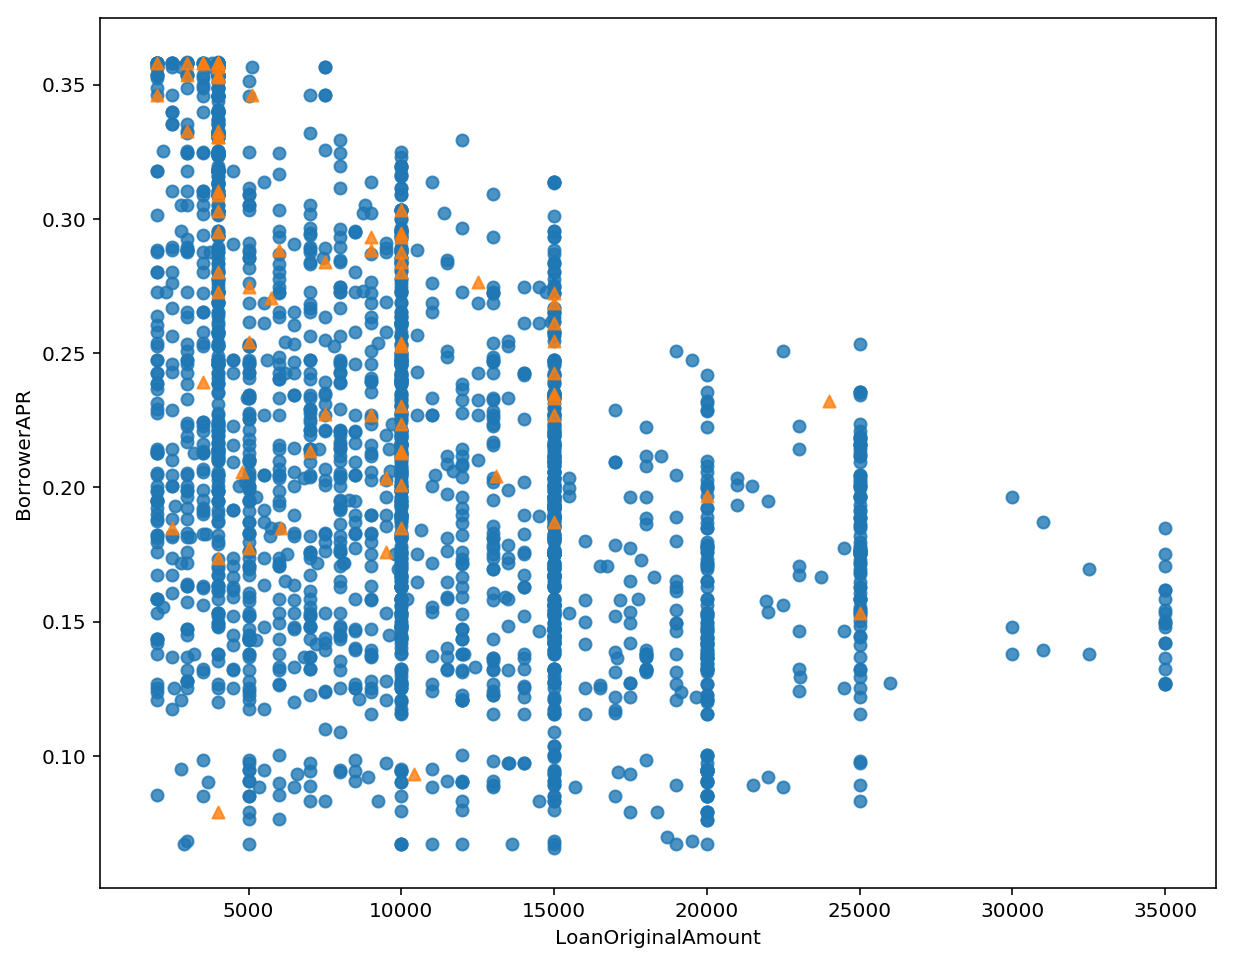

In [128]:

ttype_markers = [['Current', 'o'], 
                ['Past Due', '^']]
plt.figure(figsize = [10, 8])

for ttype, marker in ttype_markers:
    plot_data = loans_samp.loc[loans_samp['LoanStatus'] == ttype]
    sb.regplot(data = plot_data, x = 'LoanOriginalAmount', y = 'BorrowerAPR', 
              x_jitter = 0.04, fit_reg = False, marker = marker);
#    plt.xlabel('Loan Amount in USD')
#    plt.ylabel('Debt to Income Ratio')
#    plt.legend(['Completed', 'Chargedoff'])